<h1 style="text-align: center;">CS 7641: Assignment 1</h1>

In [51]:
!pip install ucimlrepo

In [2]:
!pip install --upgrade scikit-learn

In [53]:
!python --version

Python 3.9.13


# Datasets

### Abalone Dataset



In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,f1_score,accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,StratifiedKFold
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
import time
from sklearn.metrics import log_loss
import random
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
SEED = 4
random.seed(SEED)
np.random.seed(SEED)

In [4]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [5]:

X_encoded = pd.get_dummies(X, columns=['Sex'], prefix='Sex')


print(X_encoded.head())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150      0      0      1  
1         0.070      0      0      1  
2         0.210      1      0      0  
3         0.155      0      0      1  
4         0.055      0      1      0  


In [6]:
threshold = 10


y_binary = np.where(y['Rings'] < threshold, 0, 1)


y_binary_df = pd.DataFrame(y_binary, columns=['Rings_Binary'])


print(y_binary_df.head())

   Rings_Binary
0             1
1             0
2             0
3             1
4             0


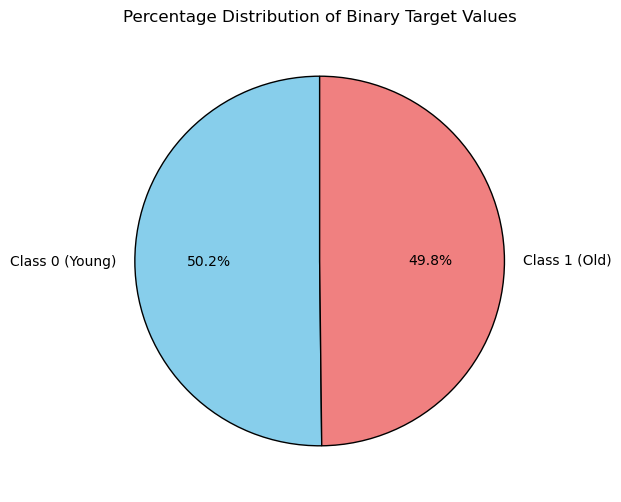

In [7]:

class_counts = np.bincount(y_binary)


labels = ['Class 0 (Young)', 'Class 1 (Old)']
percentages = [count / len(y_binary) * 100 for count in class_counts]


plt.figure(figsize=(6, 6))  # Make it a square figure
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})


plt.title('Percentage Distribution of Binary Target Values')


plt.show()

In [8]:


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, stratify=y_binary, random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)


In [9]:
columns_to_scale = ['Length', 'Diameter', 'Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
X_train_to_scale = X_train[columns_to_scale]
X_test_to_scale = X_test[columns_to_scale]


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_to_scale)


X_test_scaled = scaler.transform(X_test_to_scale)


X_train[columns_to_scale] = X_train_scaled
X_test[columns_to_scale] = X_test_scaled

In [10]:
X_train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
3972,-0.907744,-0.936746,-0.462373,-0.876411,-0.726658,-0.860959,-1.021721,0,0,1
2982,-0.117667,-0.382680,1.645912,0.722827,0.670707,1.017397,0.744810,1,0,0
203,0.048665,0.272126,0.708897,-0.029214,-0.276698,-0.237895,0.256501,1,0,0
37,-0.616663,-0.533789,-0.813754,-0.628800,-0.554814,-0.590659,-0.677032,1,0,0
217,-0.990910,-1.087855,-0.462373,-1.035004,-1.054519,-1.016725,-0.928367,0,1,0


### Telco Customer Churn

In [11]:
df_base =  pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
replaceStruct = {"Churn":     {"No": 0, "Yes": 1 }  }
oneHotCols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
            ,"InternetService","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract","PaperlessBilling","PaymentMethod"]

df2=df_base.replace(replaceStruct, inplace=True)
df2=pd.get_dummies(df_base, columns=oneHotCols)
pd.set_option('display.max_columns',100)
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [12]:
df2['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df2.dropna(inplace=True)
df2=df2.drop('customerID',axis=1)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_0                          7032 non-null   uint8  
 7   SeniorCitizen_1                          7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [14]:
df_dummies= pd.get_dummies(df2)
df_dummies


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [15]:
class_counts = df_dummies['Churn'].value_counts()
print("Class counts:\n", class_counts)

Class counts:
 0    5163
1    1869
Name: Churn, dtype: int64


In [16]:
X1 = df_dummies.drop('Churn',axis=1)
y1 = df_dummies['Churn']

In [17]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1,stratify=y1)
skf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [18]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
X1_train_to_scale = X1_train[columns_to_scale]
X1_test_to_scale = X1_test[columns_to_scale]

scaler = StandardScaler()


X1_train_scaled = scaler.fit_transform(X1_train_to_scale)


X1_test_scaled = scaler.transform(X1_test_to_scale)


X1_train[columns_to_scale] = X1_train_scaled
X1_test[columns_to_scale] = X1_test_scaled

In [19]:
X1_train[:5]

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1038,0.962182,0.532526,1.005424,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1016,1.573462,0.505989,1.459347,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3255,1.369702,1.517703,2.177150,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
6381,-1.279178,-1.502512,-0.998546,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
6296,-0.056618,-0.479188,-0.309403,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0


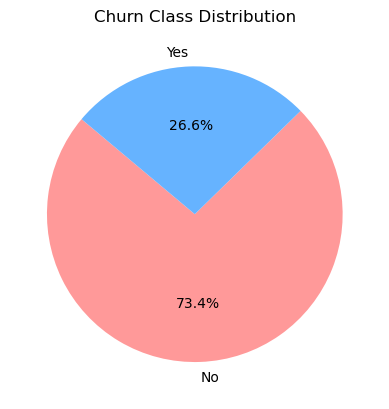

In [20]:
labels = ['No', 'Yes']
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Churn Class Distribution')
plt.show()

# KNN

### Abalone Dataset

In [20]:

k_values = [i for i in range(1, 100)]


train_scores = []
validation_scores = []

for k in k_values:
   
    knn = KNeighborsClassifier(n_neighbors=k)

   
    cv_results = cross_validate(knn, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)
   
    train_score_mean = np.mean(cv_results['train_score'])
    validation_score_mean = np.mean(cv_results['test_score'])

   
    train_scores.append(train_score_mean)
    validation_scores.append(validation_score_mean)

In [21]:

best_index = np.argmax(validation_scores)
best_k = k_values[best_index]
best_score = validation_scores[best_index]


print(f"The best value of k based on cross-validation is: {best_k}")
print(f"The corresponding cross-validation score is: {best_score:.4f}")

The best value of k based on cross-validation is: 21
The corresponding cross-validation score is: 0.7857


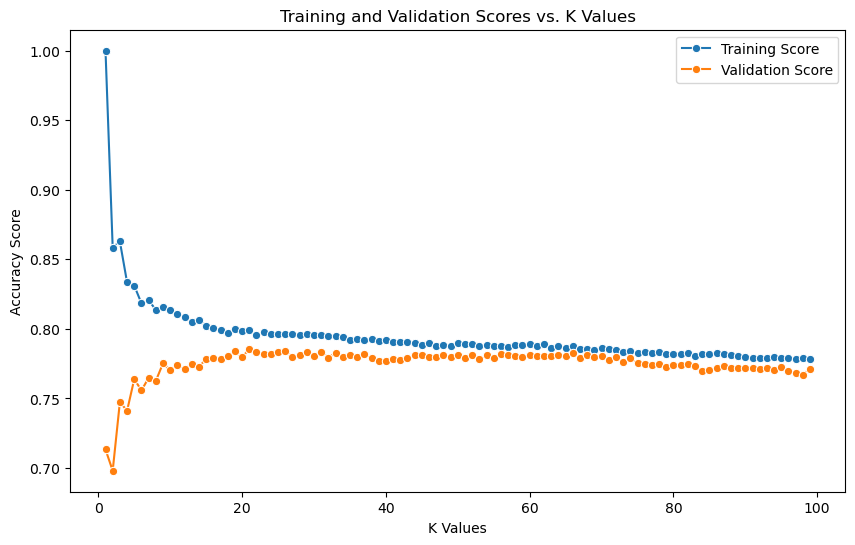

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=train_scores, marker='o', label='Training Score')
sns.lineplot(x=k_values, y=validation_scores, marker='o', label='Validation Score')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("Training and Validation Scores vs. K Values")
plt.legend()
plt.show()

In [23]:

p_values = [i for i in range(1, 10)]


distance_scores = []
distance_train_scores = []

for p in p_values:
    
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=p)

   
    cv_results = cross_validate(knn, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)

   
    distance_train_score_mean = np.mean(cv_results['train_score'])
    distance_validation_score_mean = np.mean(cv_results['test_score'])

    
    distance_train_scores.append(distance_train_score_mean)
    distance_scores.append(distance_validation_score_mean)


best_metric_index = np.argmax(distance_scores)
best_metric = p_values[best_metric_index]
best_distance_score = distance_scores[best_metric_index]


print(f"The best distance metric for k={best_k} based on cross-validation is: {best_metric}")
print(f"The corresponding cross-validation score is: {best_distance_score:.4f}")

The best distance metric for k=21 based on cross-validation is: 3
The corresponding cross-validation score is: 0.7872


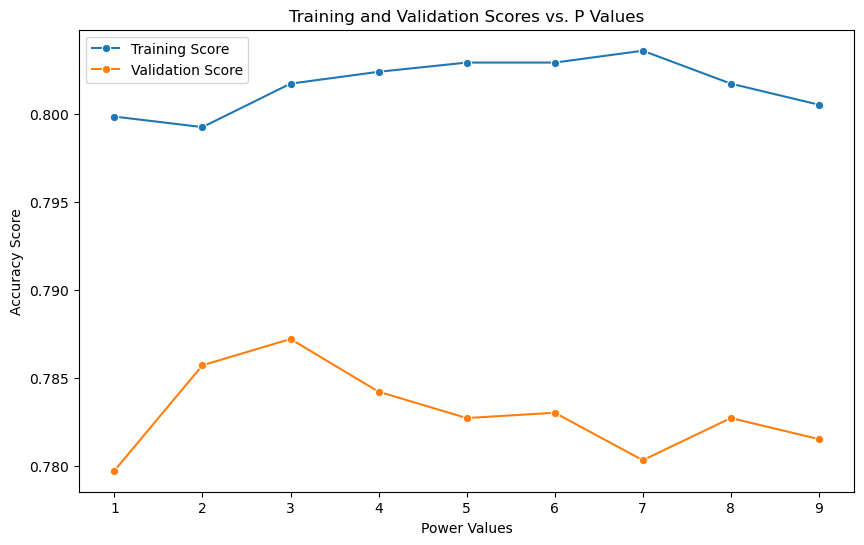

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=p_values, y=distance_train_scores, marker='o', label='Training Score')
sns.lineplot(x=p_values, y=distance_scores, marker='o', label='Validation Score')
plt.xlabel("Power Values")
plt.ylabel("Accuracy Score")
plt.title("Training and Validation Scores vs. P Values")
plt.legend()
plt.show()

In [25]:

param_grid = {
    'n_neighbors': [i for i in range(1, 50)], 
    'p': [i for i in range(1, 10)]             
}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

Best parameters found:
{'n_neighbors': 21, 'p': 3}
Best cross-validation score:
0.7871955640288929


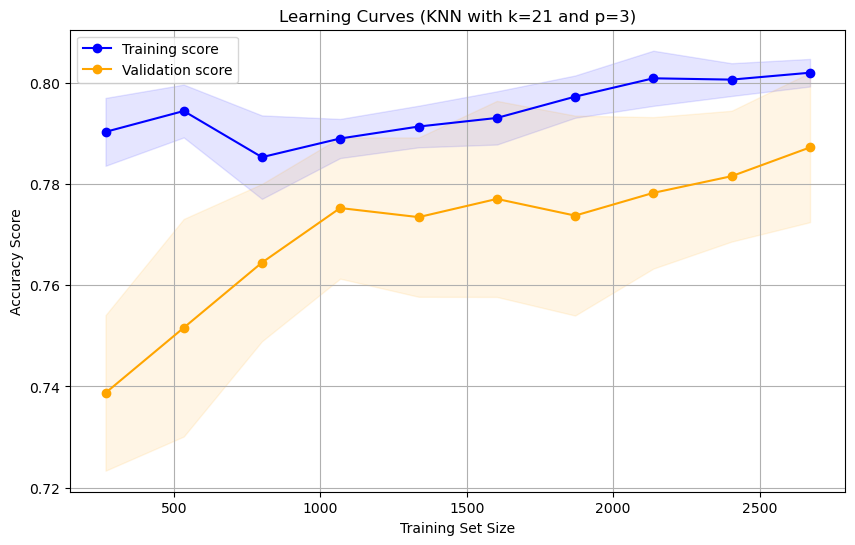

In [26]:

best_params = grid_search.best_params_


best_k = best_params['n_neighbors']
best_p = best_params['p']

knn = KNeighborsClassifier(n_neighbors=best_k, p=best_p)


train_sizes, train_scores, validation_scores = learning_curve(
    estimator=knn,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf,
    scoring='accuracy',
    n_jobs=1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='orange', label='Validation score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title(f'Learning Curves (KNN with k={best_k} and p={best_p})')
plt.legend()
plt.grid()
plt.show()


In [26]:
knn = KNeighborsClassifier( n_neighbors=21, p=3)
start_train_time=time.time()
knn.fit(X_train,y_train)
end_train_time=time.time()
start_infer_time=time.time()
y_pred = knn.predict(X_test)
end_infer_time=time.time()
report = classification_report(y_test, y_pred)
print(report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
train_time_knn1 = end_train_time - start_train_time
infer_time_knn1 = end_infer_time - start_infer_time
print(f"Training time: {train_time_knn1:.4f} seconds")
print(f"Inference time: {infer_time_knn1:.4f} seconds")

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       420
           1       0.79      0.80      0.80       416

    accuracy                           0.80       836
   macro avg       0.80      0.80      0.80       836
weighted avg       0.80      0.80      0.80       836

Accuracy: 0.7966507177033493
Training time: 0.0110 seconds
Inference time: 0.1104 seconds


### Telco Customer Churn

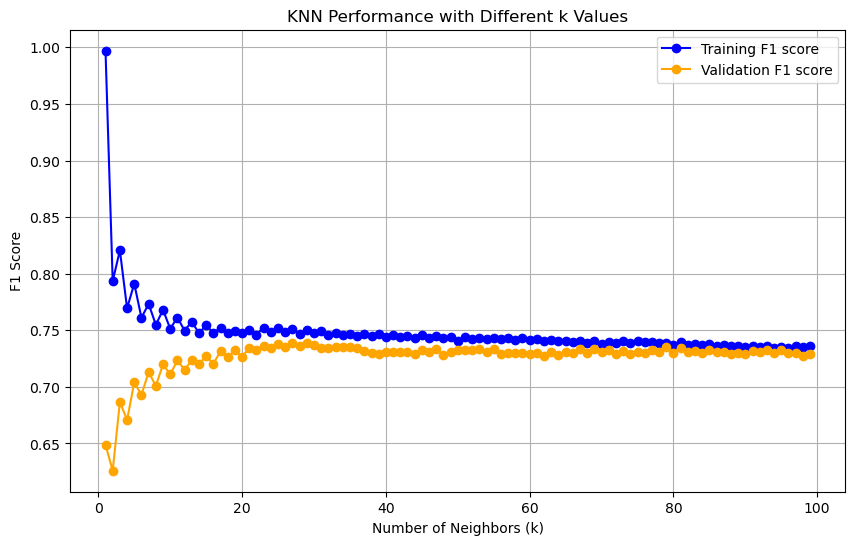

In [28]:

k_values = [i for i in range(1, 100)]

train_scores = []
validation_scores = []




for k in k_values:
   
    knn = KNeighborsClassifier(n_neighbors=k)

    
    cv_results = cross_validate(knn, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

    
    train_score_mean = np.mean(cv_results['train_score'])
    validation_score_mean = np.mean(cv_results['test_score'])

    
    train_scores.append(train_score_mean)
    validation_scores.append(validation_score_mean)




plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, 'o-', color='blue', label='Training F1 score')
plt.plot(k_values, validation_scores, 'o-', color='orange', label='Validation F1 score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.title('KNN Performance with Different k Values')
plt.legend()
plt.grid()
plt.show()


In [29]:

best_index = np.argmax(validation_scores)
best_k = k_values[best_index]
best_score = validation_scores[best_index]


print(f"The best value of k based on cross-validation is: {best_k}")
print(f"The corresponding cross-validation score is: {best_score:.4f}")

The best value of k based on cross-validation is: 29
The corresponding cross-validation score is: 0.7390


In [30]:

p_values = [i for i in range(1, 10)]


distance_scores = []
distance_train_scores = []

for p in p_values:
    
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=p)

   
    cv_results = cross_validate(knn, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

    
    distance_train_score_mean = np.mean(cv_results['train_score'])
    distance_validation_score_mean = np.mean(cv_results['test_score'])

    
    distance_train_scores.append(distance_train_score_mean)
    distance_scores.append(distance_validation_score_mean)


best_metric_index = np.argmax(distance_scores)
best_metric = p_values[best_metric_index]
best_distance_score = distance_scores[best_metric_index]


print(f"The best distance metric for k={best_k} based on cross-validation is: {best_metric}")
print(f"The corresponding cross-validation score is: {best_distance_score:.4f}")

The best distance metric for k=29 based on cross-validation is: 3
The corresponding cross-validation score is: 0.7395


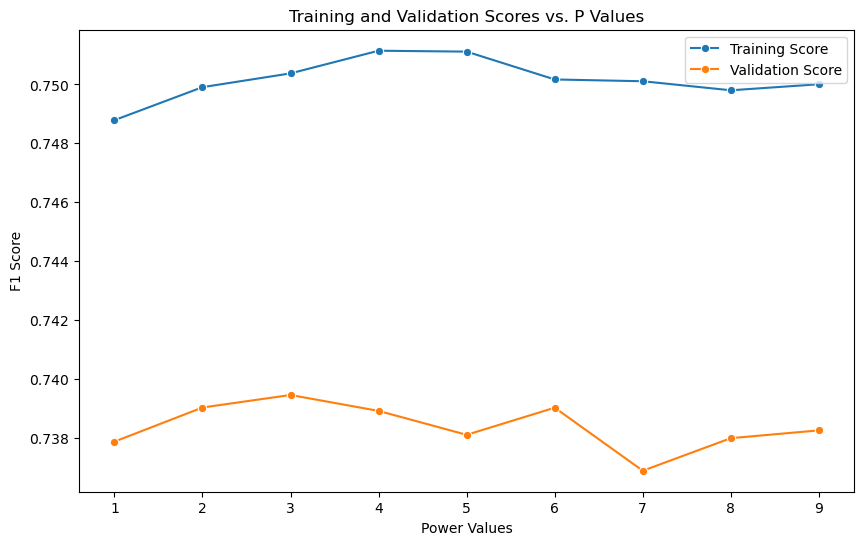

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=p_values, y=distance_train_scores, marker='o', label='Training Score')
sns.lineplot(x=p_values, y=distance_scores, marker='o', label='Validation Score')
plt.xlabel("Power Values")
plt.ylabel("F1 Score")
plt.title("Training and Validation Scores vs. P Values")
plt.legend()
plt.show()

In [32]:

param_grid = {
    'n_neighbors': [i for i in range(20, 50)], 
    'p': [i for i in range(1, 5)]             
}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf1, scoring='f1_macro')


grid_search.fit(X1_train, y1_train)


print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

Best parameters found:
{'n_neighbors': 29, 'p': 3}
Best cross-validation score:
0.739459826934322


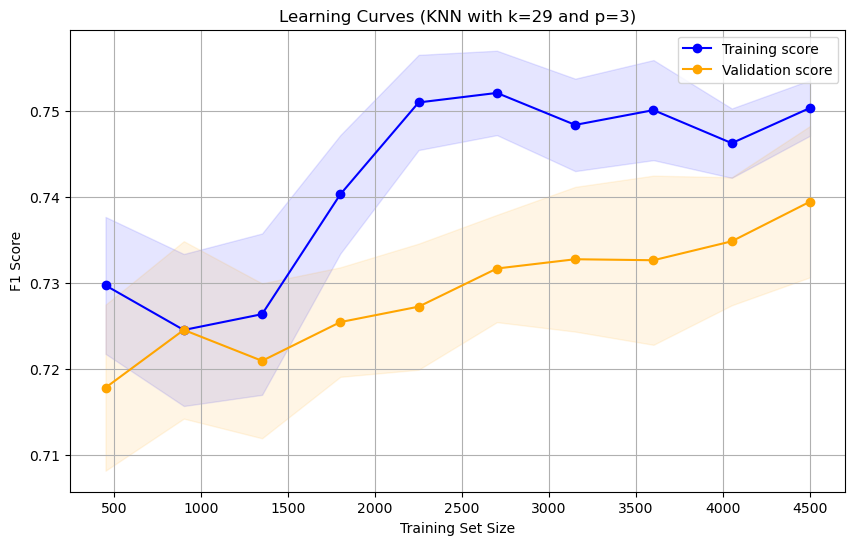

In [33]:

best_params = grid_search.best_params_


best_k = best_params['n_neighbors']
best_p = best_params['p']

knn = KNeighborsClassifier(n_neighbors=best_k, p=best_p)


train_sizes, train_scores, validation_scores = learning_curve(
    estimator=knn,
    X=X1_train,
    y=y1_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf1,
    scoring='f1_macro',
    n_jobs=1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='orange', label='Validation score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title(f'Learning Curves (KNN with k={best_k} and p={best_p})')
plt.legend()
plt.grid()
plt.show()


In [39]:
knn = KNeighborsClassifier( n_neighbors=29, p=3)
start_train_time=time.time()
knn.fit(X1_train, y1_train)
end_train_time=time.time()
start_infer_time=time.time()
y1_pred = knn.predict(X1_test)
end_infer_time=time.time()
report = classification_report(y1_test, y1_pred)
print(report)
f1_macro = f1_score(y1_test, y1_pred, average='macro')
print(f"Macro-average F1 score: {f1_macro}")
train_time_knn2 = end_train_time - start_train_time
infer_time_knn2 = end_infer_time - start_infer_time
print(f"Training time: {train_time_knn2:.4f} seconds")
print(f"Inference time: {infer_time_knn2:.4f} seconds")

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407

Macro-average F1 score: 0.7081673075763408
Training time: 0.0031 seconds
Inference time: 0.7285 seconds


# SVM

### Telco Customer Churn

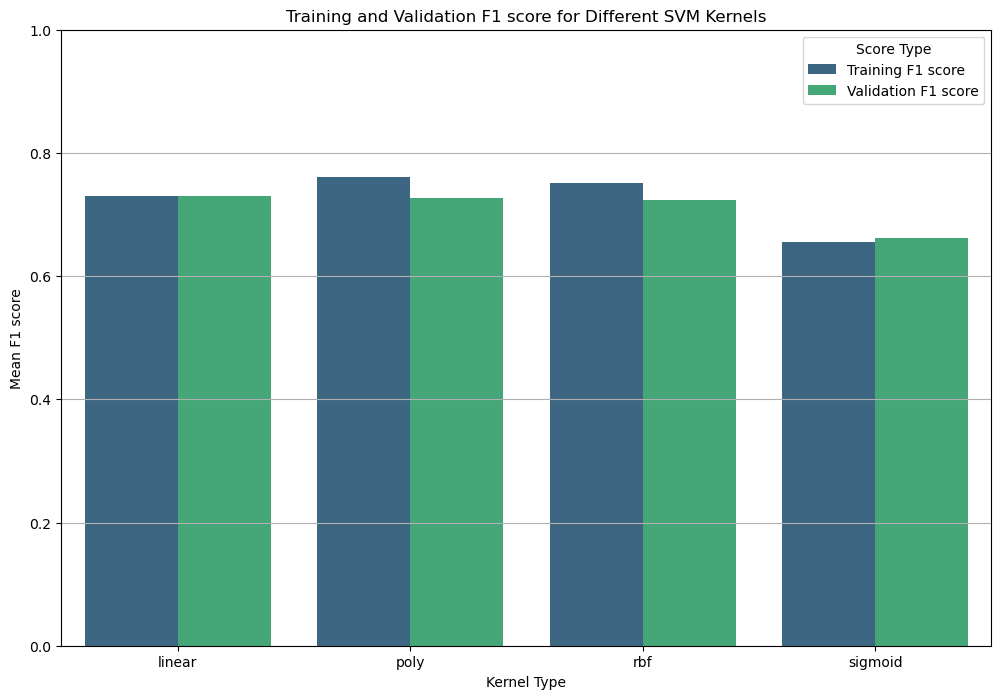

In [53]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']


train_scores = []
cv_scores = []

for kernel in kernels:
   
    svc = SVC(kernel=kernel)

    
    cv_results = cross_validate(svc, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

   
    train_scores.append(cv_results['train_score'].mean())
    cv_scores.append(cv_results['test_score'].mean())


results_df = pd.DataFrame({
    'Kernel': kernels,
    'Training F1 score': train_scores,
    'Validation F1 score': cv_scores
})


results_melted = results_df.melt(id_vars='Kernel', var_name='Score Type', value_name='Mean F1 score')


plt.figure(figsize=(12, 8))
sns.barplot(x='Kernel', y='Mean F1 score', hue='Score Type', data=results_melted, palette='viridis')
plt.xlabel('Kernel Type')
plt.ylabel('Mean F1 score')
plt.title('Training and Validation F1 score for Different SVM Kernels')
plt.ylim(0, 1)  
plt.grid(axis='y')
plt.show()

In [54]:
best_ker_index = np.argmax(cv_scores)
best_ker = kernels[best_ker_index]
best_validation_score = cv_scores[best_ker_index]

print("Best kernel based on validation F1:", best_ker)
print("Best validation F1:", best_validation_score)

Best kernel based on validation F1: linear
Best validation F1: 0.72979031123533


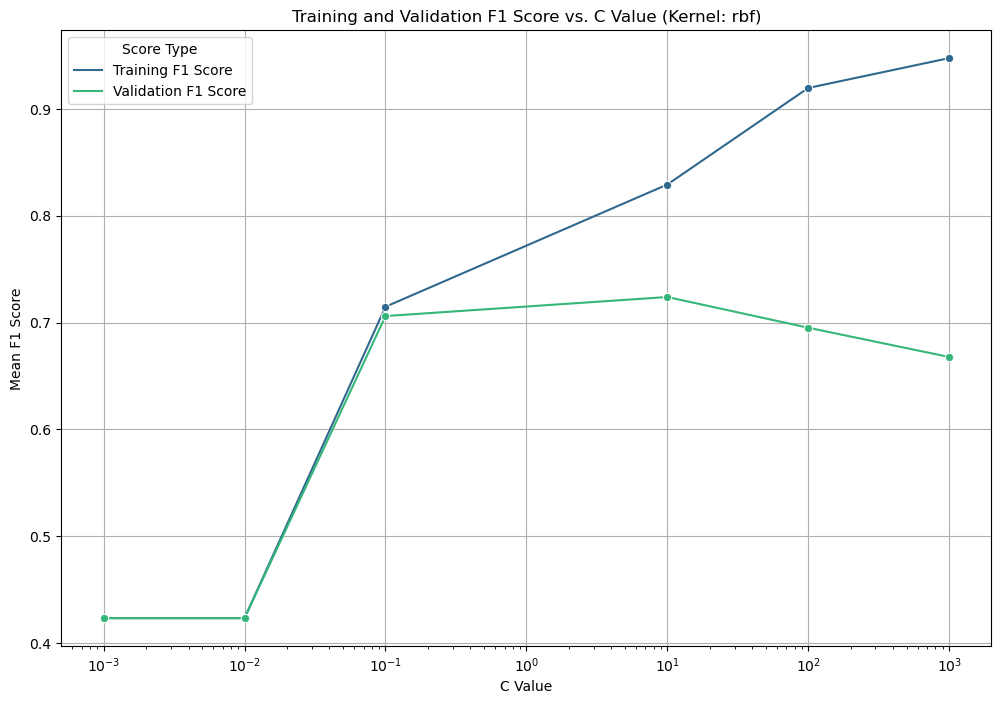

In [55]:

kernel='rbf'


C_values = [1e-3, 1e-2, 0.1, 10 , 1e2,1e3]


train_scores = []
cv_scores = []

for C in C_values:
    
    svc = SVC(kernel=kernel, C=C,random_state=1)

    
    cv_results = cross_validate(svc, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

    
    train_scores.append(cv_results['train_score'].mean())
    cv_scores.append(cv_results['test_score'].mean())


results_df = pd.DataFrame({
    'C Value': C_values,
    'Training F1 Score': train_scores,
    'Validation F1 Score': cv_scores
})


results_melted = results_df.melt(id_vars='C Value', var_name='Score Type', value_name='Mean F1 Score')


plt.figure(figsize=(12, 8))
sns.lineplot(x='C Value', y='Mean F1 Score', hue='Score Type', data=results_melted, marker='o', palette='viridis')
plt.xscale('log')  
plt.xlabel('C Value')
plt.ylabel('Mean F1 Score')
plt.title(f'Training and Validation F1 Score vs. C Value (Kernel: {kernel})')
plt.grid(True)
plt.show()


In [56]:
best_C_index = np.argmax(cv_scores)
best_C = C_values[best_C_index]
best_validation_score = cv_scores[best_C_index]

print("Best value of C based on validation F1 score:", best_C)
print("Best validation F1 score:", best_validation_score)

Best value of C based on validation F1 score: 10
Best validation F1 score: 0.7239025232281961


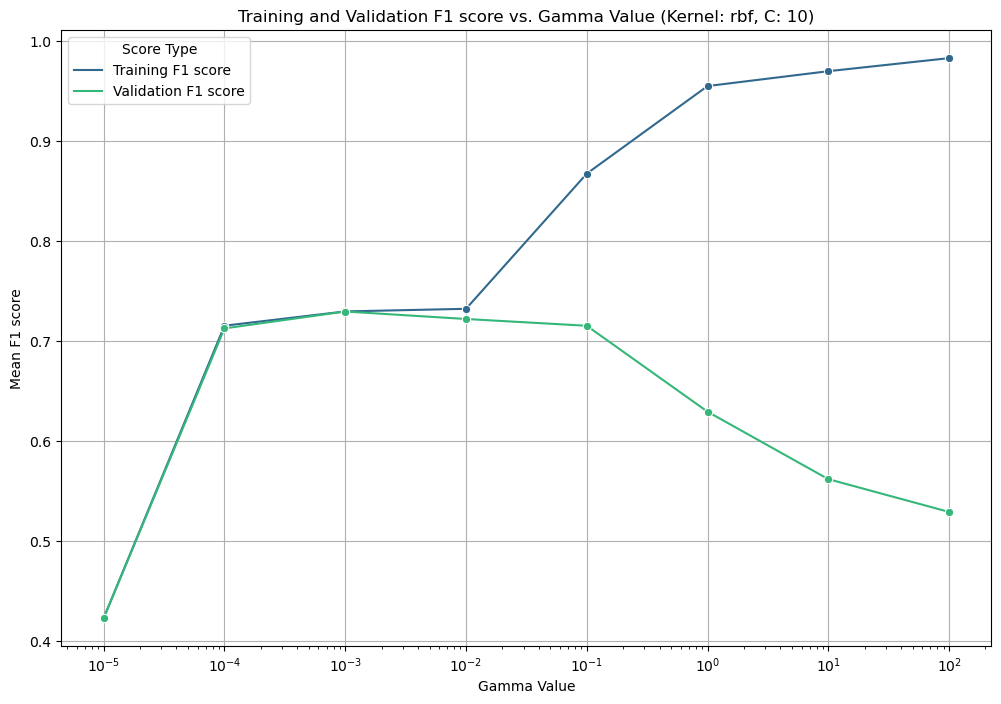

In [57]:

best_Cost = best_C  


gamma_values = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]


train_scores = []
cv_scores = []

for gamma in gamma_values:
   
    svc = SVC(kernel=kernel, C=best_Cost, gamma=gamma,random_state=1)

    
    cv_results = cross_validate(svc, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

    
    train_scores.append(cv_results['train_score'].mean())
    cv_scores.append(cv_results['test_score'].mean())


results_df = pd.DataFrame({
    'Gamma Value': gamma_values,
    'Training F1 score': train_scores,
    'Validation F1 score': cv_scores
})


results_melted = results_df.melt(id_vars='Gamma Value', var_name='Score Type', value_name='Mean F1 score')


plt.figure(figsize=(12, 8))
sns.lineplot(x='Gamma Value', y='Mean F1 score', hue='Score Type', data=results_melted, marker='o', palette='viridis')
plt.xscale('log') 
plt.xlabel('Gamma Value')
plt.ylabel('Mean F1 score')
plt.title(f'Training and Validation F1 score vs. Gamma Value (Kernel: {kernel}, C: {best_C})')
plt.grid(True)
plt.show()

In [40]:
param_grid = {
    'kernel': ['linear','poly' ,'rbf'],
    'C': [0.01,0.1,1],
    'gamma':[1e-2, 0.1, 1]
    
    
}


svc = SVC(random_state=1)


grid_search = GridSearchCV(svc, param_grid, cv=skf1, scoring='f1_macro', return_train_score=True)


grid_search.fit(X1_train, y1_train)


results = pd.DataFrame(grid_search.cv_results_)


print(f"Best parameters : {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

Best parameters : {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
Best F1 Score: 0.7298322408731979


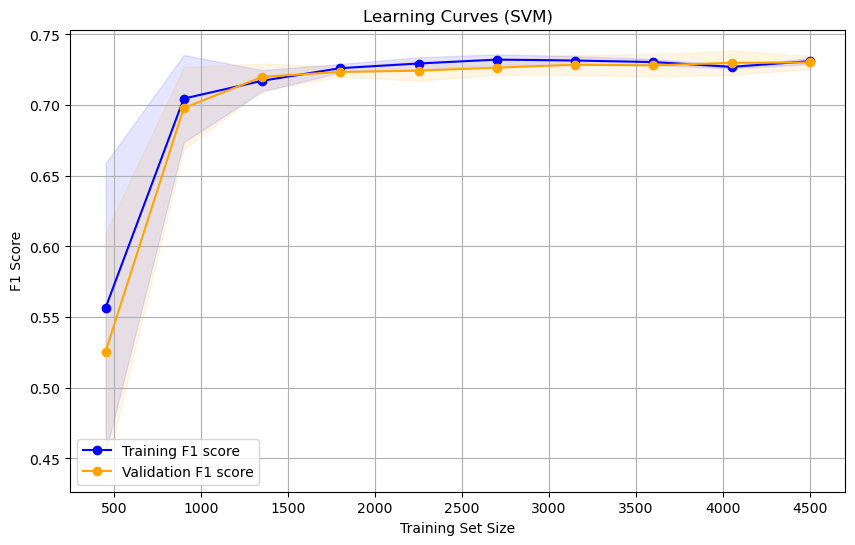

In [28]:

svc = SVC(kernel='linear', C=0.01,random_state=1)


train_sizes, train_scores, validation_scores = learning_curve(
    estimator=svc,
    X=X1_train,
    y=y1_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf,
    scoring='f1_macro',
    n_jobs=1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training F1 score')
plt.plot(train_sizes, validation_mean, 'o-', color='orange', label='Validation F1 score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title(f'Learning Curves (SVM)')
plt.legend()
plt.grid()
plt.show()


In [29]:

start_train_time = time.time()
svc.fit(X1_train,y1_train)
end_train_time = time.time()
start_infer_time = time.time()
y1_pred = svc.predict(X1_test)
end_infer_time = time.time()
report = classification_report(y1_test, y1_pred)
print(report)
f1_macro = f1_score(y1_test, y1_pred, average='macro')
print(f"Macro-average F1 score: {f1_macro}")
train_time_svm2 = end_train_time - start_train_time
infer_time_svm2 = end_infer_time - start_infer_time
print(f"Training time: {train_time_svm2:.4f} seconds")
print(f"Inference time: {infer_time_svm2:.4f} seconds")

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Macro-average F1 score: 0.7189401893486707
Training time: 0.3465 seconds
Inference time: 0.0943 seconds


### Abalone Dataset

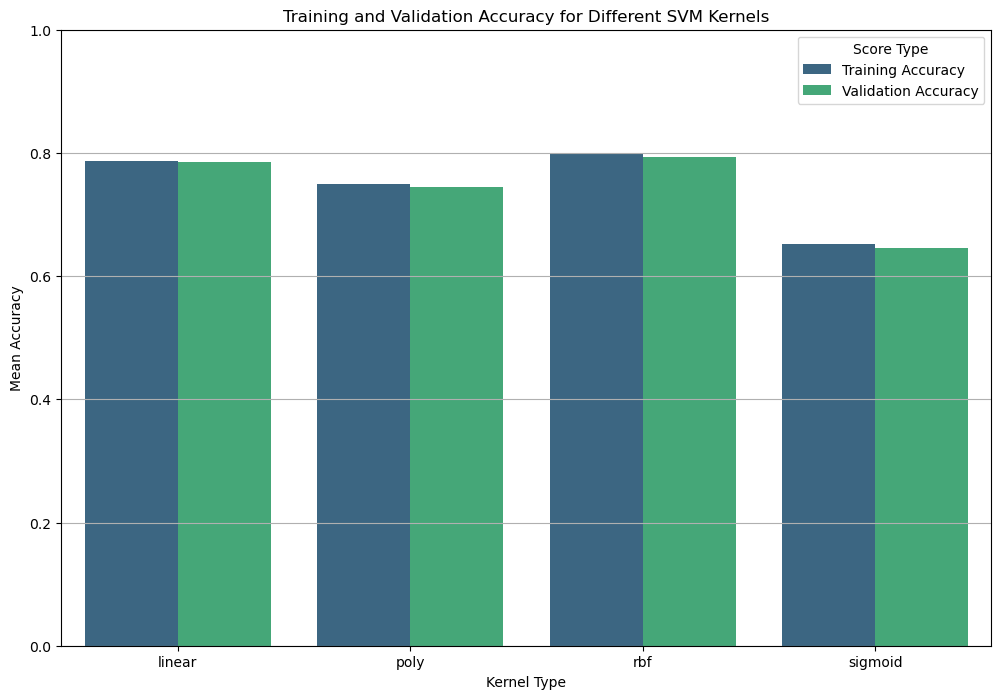

In [43]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']


train_scores = []
cv_scores = []

for kernel in kernels:
    
    svc = SVC(kernel=kernel,random_state=SEED)

    
    cv_results = cross_validate(svc, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)

    
    train_scores.append(cv_results['train_score'].mean())
    cv_scores.append(cv_results['test_score'].mean())


results_df = pd.DataFrame({
    'Kernel': kernels,
    'Training Accuracy': train_scores,
    'Validation Accuracy': cv_scores
})


results_melted = results_df.melt(id_vars='Kernel', var_name='Score Type', value_name='Mean Accuracy')


plt.figure(figsize=(12, 8))
sns.barplot(x='Kernel', y='Mean Accuracy', hue='Score Type', data=results_melted, palette='viridis')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Accuracy')
plt.title('Training and Validation Accuracy for Different SVM Kernels')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

In [44]:
best_ker_index = np.argmax(cv_scores)
best_ker = kernels[best_ker_index]
best_validation_score = cv_scores[best_ker_index]

print("Best kernel based on validation accuracy:", best_ker)
print("Best validation accuracy:", best_validation_score)

Best kernel based on validation accuracy: rbf
Best validation accuracy: 0.7937756773448619


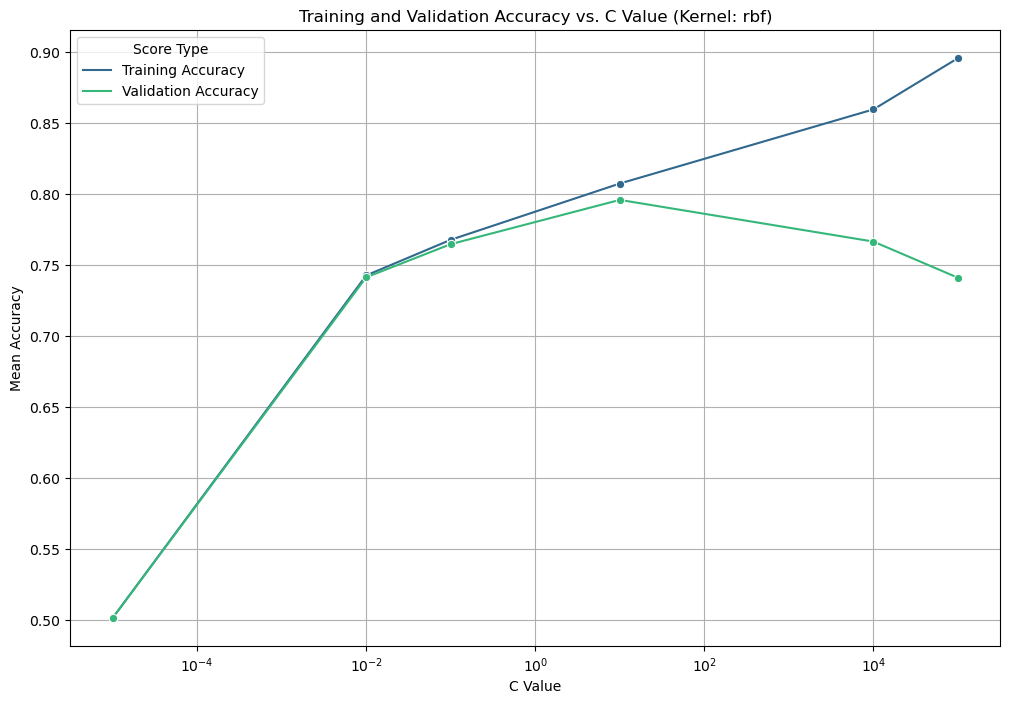

In [45]:

best_kernel = best_ker

C_values =([1e-5, 1e-2, 0.1, 10 , 1e4,1e5])


train_scores = []
cv_scores = []

for C in C_values:
   
    svc = SVC(kernel=best_kernel, C=C,random_state=SEED)

    
    cv_results = cross_validate(svc, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)

    
    train_scores.append(cv_results['train_score'].mean())
    cv_scores.append(cv_results['test_score'].mean())


results_df = pd.DataFrame({
    'C Value': C_values,
    'Training Accuracy': train_scores,
    'Validation Accuracy': cv_scores
})


results_melted = results_df.melt(id_vars='C Value', var_name='Score Type', value_name='Mean Accuracy')


plt.figure(figsize=(12, 8))
sns.lineplot(x='C Value', y='Mean Accuracy', hue='Score Type', data=results_melted, marker='o', palette='viridis')
plt.xscale('log') 
plt.xlabel('C Value')
plt.ylabel('Mean Accuracy')
plt.title(f'Training and Validation Accuracy vs. C Value (Kernel: {best_kernel})')
plt.grid(True)
plt.show()

In [46]:
best_C_index = np.argmax(cv_scores)
best_C = C_values[best_C_index]
best_validation_score = cv_scores[best_C_index]

print("Best value of C based on validation accuracy:", best_C)
print("Best validation accuracy:", best_validation_score)

Best value of C based on validation accuracy: 10
Best validation accuracy: 0.7958746184760523


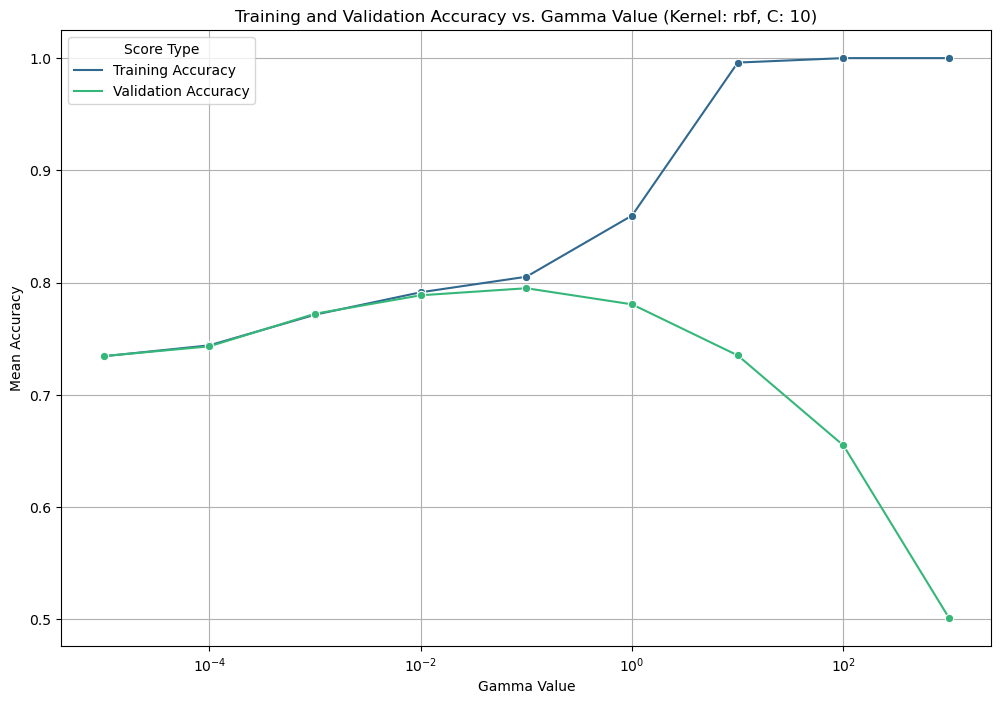

In [47]:

best_kernel = 'rbf'  
best_Cost = best_C  


gamma_values = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]


train_scores = []
cv_scores = []

for gamma in gamma_values:
    
    svc = SVC(kernel=best_ker, C=best_Cost, gamma=gamma,random_state=SEED)

    
    cv_results = cross_validate(svc, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)

    
    train_scores.append(cv_results['train_score'].mean())
    cv_scores.append(cv_results['test_score'].mean())


results_df = pd.DataFrame({
    'Gamma Value': gamma_values,
    'Training Accuracy': train_scores,
    'Validation Accuracy': cv_scores
})


results_melted = results_df.melt(id_vars='Gamma Value', var_name='Score Type', value_name='Mean Accuracy')


plt.figure(figsize=(12, 8))
sns.lineplot(x='Gamma Value', y='Mean Accuracy', hue='Score Type', data=results_melted, marker='o', palette='viridis')
plt.xscale('log')  
plt.xlabel('Gamma Value')
plt.ylabel('Mean Accuracy')
plt.title(f'Training and Validation Accuracy vs. Gamma Value (Kernel: {best_kernel}, C: {best_C})')
plt.grid(True)
plt.show()




In [48]:
best_gamma_index = np.argmax(cv_scores)
best_gamma = gamma_values[best_gamma_index]
best_validation_score = cv_scores[best_gamma_index]

print("Best value of gamma based on validation accuracy:", best_gamma)
print("Best validation accuracy:", best_validation_score)

Best value of gamma based on validation accuracy: 0.1
Best validation accuracy: 0.7949750722769707


In [49]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1,1, 10],
    'gamma':[ 1e-4, 1e-3, 1e-2, 0.1, 1]
}


svc = SVC(random_state=SEED)


grid_search = GridSearchCV(svc, param_grid, cv=skf, scoring='accuracy', return_train_score=True)


grid_search.fit(X_train, y_train)


results = pd.DataFrame(grid_search.cv_results_)


print(f"Best parameters : {grid_search.best_params_}")
print(f"Best accuracy : {grid_search.best_score_}")

Best parameters : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best accuracy : 0.7949750722769707


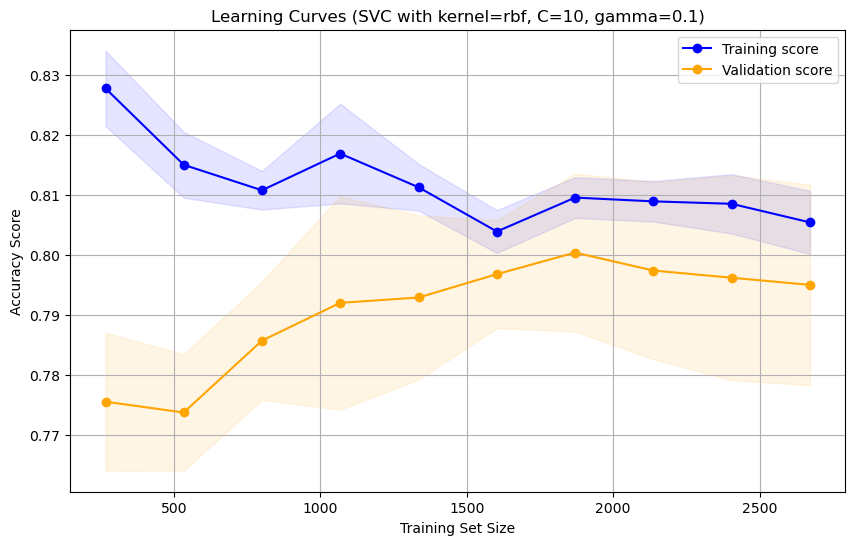

In [50]:



svc = SVC(kernel='rbf', C=10, gamma=0.1,random_state=SEED)


train_sizes, train_scores, validation_scores = learning_curve(
    estimator=svc,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='orange', label='Validation score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title(f'Learning Curves (SVC with kernel={best_kernel}, C={best_C}, gamma={best_gamma})')
plt.legend()
plt.grid()
plt.show()

In [30]:
svc = SVC(kernel='rbf', C=10, gamma=0.1,random_state=SEED)
start_train_time=time.time()
svc.fit(X_train,y_train)
end_train_time=time.time()
start_infer_time=time.time()
y_pred = svc.predict(X_test)
end_infer_time=time.time()
report = classification_report(y_test, y_pred)
print(report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
train_time_svm1 = end_train_time - start_train_time
infer_time_svm1 = end_infer_time - start_infer_time
print(f"Training time: {train_time_svm1:.4f} seconds")
print(f"Inference time: {infer_time_svm1:.4f} seconds")

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       420
           1       0.80      0.84      0.82       416

    accuracy                           0.82       836
   macro avg       0.82      0.82      0.82       836
weighted avg       0.82      0.82      0.82       836

Accuracy: 0.8157894736842105
Training time: 0.1993 seconds
Inference time: 0.0672 seconds


# NN

### Abalone Dataset

In [79]:
hidden_layer_sizes =[ (1,1),(5,5 ), (10,10 ), (15,15 ), (20,20 ), (25,25 ), (30, 30), (35,35 ), (40,40 ), (45,45 )]


train_scores = []
validation_scores = []

for size in hidden_layer_sizes:
    
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=SEED)

   
    cv_results = cross_validate(mlp, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)

    
    train_scores.append(np.mean(cv_results['train_score']))
    validation_scores.append(np.mean(cv_results['test_score']))


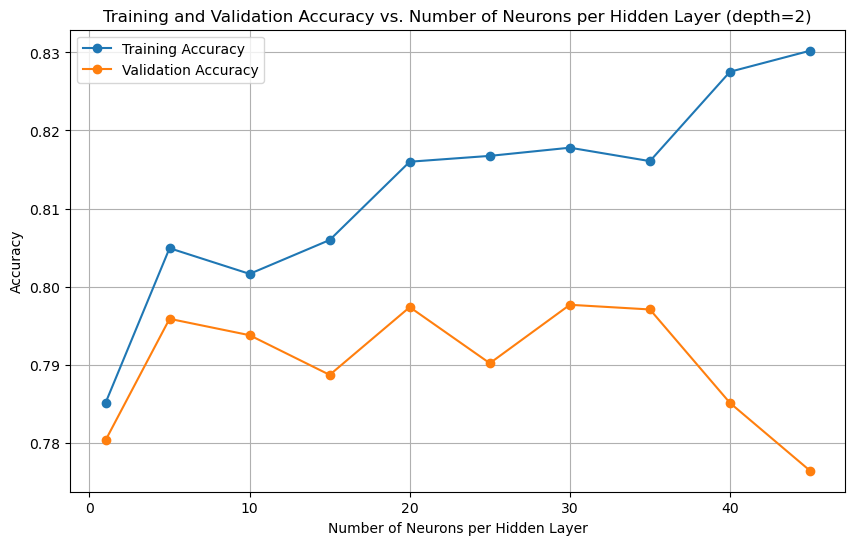

In [80]:

hidden_layer_sizes_int = [size[0] for size in hidden_layer_sizes]


plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_int, train_scores, label='Training Accuracy', marker='o')
plt.plot(hidden_layer_sizes_int, validation_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Neurons per Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Neurons per Hidden Layer (depth=2)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:

hidden_layer_sizes = [(6,),(6,6),(6,6,6),(6,6,6,6)]


train_scores = []
validation_scores = []

for size in hidden_layer_sizes:
   
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=SEED)

    
    cv_results = cross_validate(mlp, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)

   
    train_scores.append(np.mean(cv_results['train_score']))
    validation_scores.append(np.mean(cv_results['test_score']))


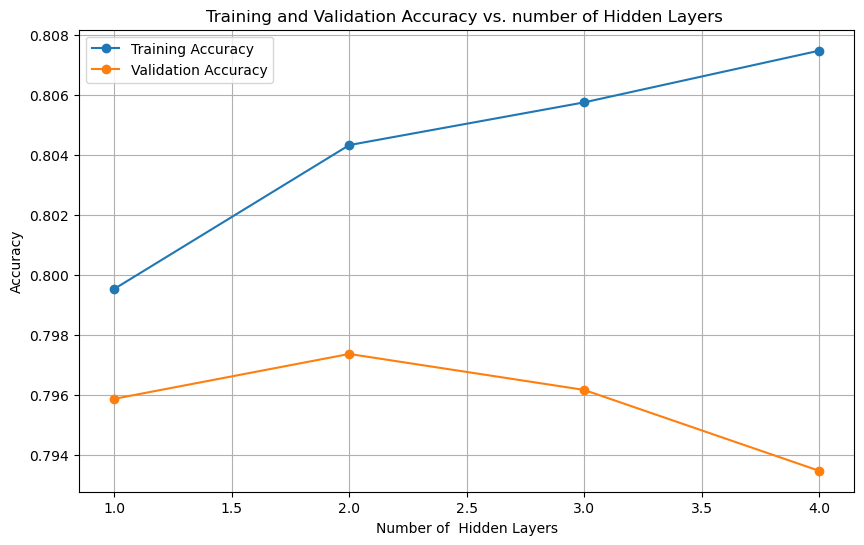

In [25]:

hidden_layer_sizes_int = [len(size) for size in hidden_layer_sizes]


plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_int, train_scores, label='Training Accuracy', marker='o')
plt.plot(hidden_layer_sizes_int, validation_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of  Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. number of Hidden Layers ')
plt.legend()
plt.grid(True)
plt.show()


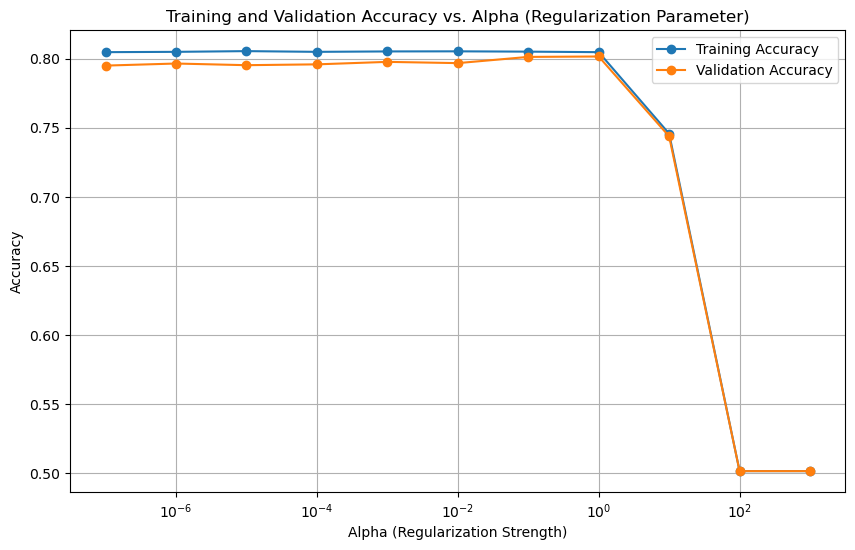

In [101]:

alpha_values = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3]


train_scores_alpha = []
validation_scores_alpha = []


hidden_layer_size = (15,)

for alpha in alpha_values:
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, alpha=alpha, max_iter=1000,random_state=SEED)
    
    
    cv_results = cross_validate(mlp, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)
    
    
    train_scores_alpha.append(np.mean(cv_results['train_score']))
    validation_scores_alpha.append(np.mean(cv_results['test_score']))


plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores_alpha, label='Training Accuracy', marker='o')
plt.plot(alpha_values, validation_scores_alpha, label='Validation Accuracy', marker='o')
plt.xscale('log')  
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Alpha (Regularization Parameter)')
plt.legend()
plt.grid(True)
plt.show()


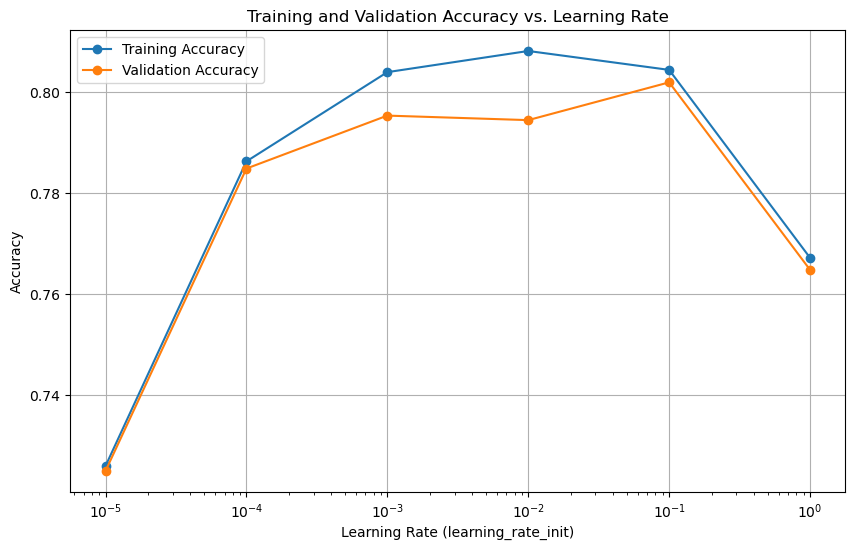

In [95]:

learning_rate_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]


train_scores_lr = []
validation_scores_lr = []


hidden_layer_size = (15,)

for lr in learning_rate_values:
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr, max_iter=1000, random_state=SEED)
    
   
    cv_results = cross_validate(mlp, X_train, y_train, cv=skf, scoring='accuracy', return_train_score=True)
    
    
    train_scores_lr.append(np.mean(cv_results['train_score']))
    validation_scores_lr.append(np.mean(cv_results['test_score']))


plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_scores_lr, label='Training Accuracy', marker='o')
plt.plot(learning_rate_values, validation_scores_lr, label='Validation Accuracy', marker='o')
plt.xscale('log') 
plt.xlabel('Learning Rate (learning_rate_init)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

In [319]:
hidden_layer_sizes = (
    [(i,) for i in range(5, 20)] + 
    [(i, j) for i in range(5, 20) for j in range(5, 20)]  
    
)



param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes
}


mlp = MLPClassifier(max_iter=1000, random_state=SEED)


grid_search = GridSearchCV(mlp, param_grid, cv=skf, scoring='accuracy', return_train_score=True)


grid_search.fit(X_train, y_train)


print("Best hidden layer architecture: ", grid_search.best_params_)


print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

C:\Users\mehdi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


Best hidden layer architecture:  {'hidden_layer_sizes': (9, 16)}
Best cross-validation score: 0.8043


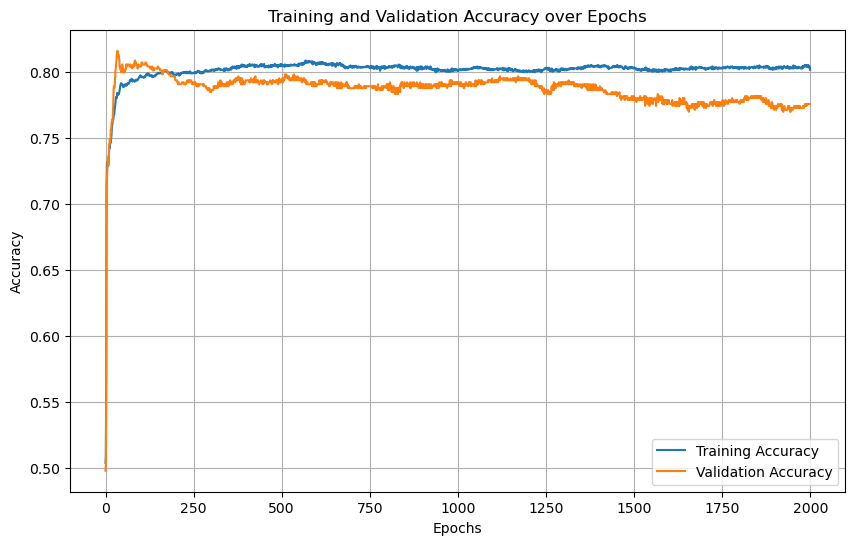

In [111]:
X_train2, X_valid, Y_train2, Y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED,stratify=y_train)
mlp=MLPClassifier(hidden_layer_sizes=(9,16),max_iter=1, random_state=SEED,warm_start=True)
training_accuracy = []
validation_accuracy = []
for epoch in range(2000): 
    mlp.fit(X_train2, Y_train2)
    
    
   
    Y_train_pred = mlp.predict(X_train2)
    curr_train_accuracy = accuracy_score(Y_train2, Y_train_pred)
    
    
    Y_valid_pred = mlp.predict(X_valid)
    curr_valid_accuracy = accuracy_score(Y_valid, Y_valid_pred)
    
    
    training_accuracy.append(curr_train_accuracy)
    validation_accuracy.append(curr_valid_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label="Training Accuracy")
plt.plot(validation_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

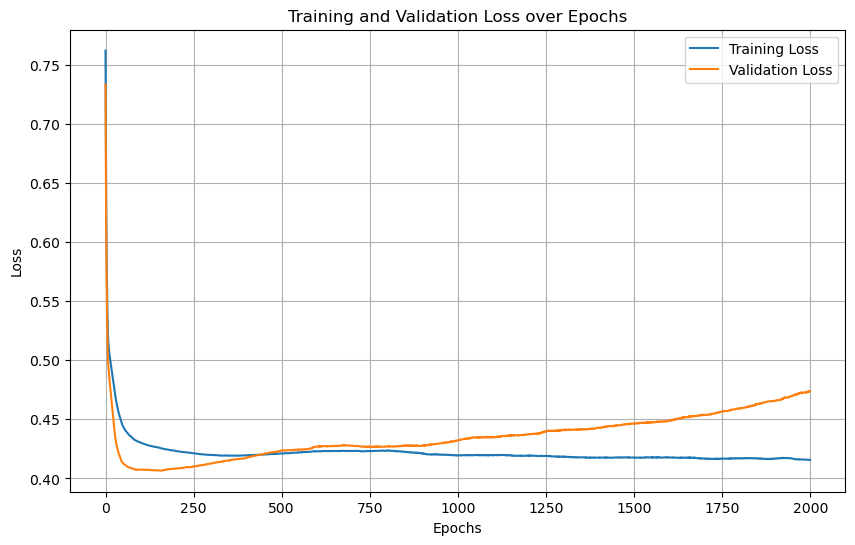

In [112]:
train_loss_, valid_loss_ = [], []
mlp=MLPClassifier(hidden_layer_sizes=(9,16),max_iter=1, random_state=SEED,warm_start=True)

for epoch in range(2000):
    mlp.fit(X_train2, Y_train2) 
    train_loss_.append(mlp.loss_)
    valid_loss_.append(log_loss(Y_valid, mlp.predict_proba(X_valid)))

plt.figure(figsize=(10, 6))
plt.plot(train_loss_, label="Training Loss")
plt.plot(valid_loss_, label="Validation Loss")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
param_grid = {
     
    'learning_rate_init': [ 0.001,0.01, 0.1], 
    'alpha': [ 0.01,0.1,1]      
}
mlp = MLPClassifier(hidden_layer_sizes=(9,16),max_iter=1000, random_state=SEED)


grid_search = GridSearchCV(mlp, param_grid, cv=skf, scoring='accuracy', return_train_score=True)


grid_search.fit(X_train, y_train)


print("Best hidden layer architecture: ", grid_search.best_params_)


print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best hidden layer architecture:  {'alpha': 0.01, 'learning_rate_init': 0.001}
Best cross-validation score: 0.8031


In [31]:
mlp=MLPClassifier(hidden_layer_sizes=(9,16),max_iter=1000, random_state=SEED,alpha=0.01, learning_rate_init= 0.001)

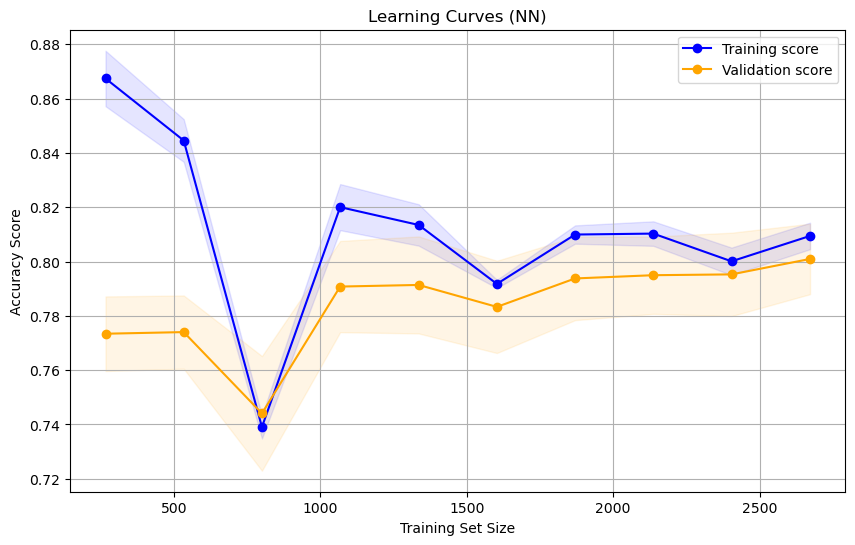

In [32]:

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=mlp,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='orange', label='Validation score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title(f'Learning Curves (NN)')
plt.legend()
plt.grid()
plt.show()

In [33]:
start_train_time=time.perf_counter()
mlp.fit(X_train,y_train)
end_train_time=time.perf_counter()
start_infer_time=time.perf_counter()
y_pred = mlp.predict(X_test)
end_infer_time=time.perf_counter()
report = classification_report(y_test, y_pred)
print(report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
train_time_nn1 = end_train_time - start_train_time
infer_time_nn1 = end_infer_time - start_infer_time
print(f"Training time: {train_time_nn1:.4f} seconds")
print(f"Inference time: {infer_time_nn1:.4f} seconds")

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       420
           1       0.80      0.85      0.82       416

    accuracy                           0.82       836
   macro avg       0.82      0.82      0.82       836
weighted avg       0.82      0.82      0.82       836

Accuracy: 0.819377990430622
Training time: 2.1692 seconds
Inference time: 0.0021 seconds


### Telco Customer Churn

In [77]:

hidden_layer_sizes = [ (1,1),(5,5 ), (10,10 ), (15,15 ), (20,20 ), (25,25 ), (30, 30), (35,35 ), (40,40 ), (45,45)]



train_scores = []
validation_scores = []

for size in hidden_layer_sizes:
    
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=1)

    
    cv_results = cross_validate(mlp, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

    
    train_scores.append(np.mean(cv_results['train_score']))
    validation_scores.append(np.mean(cv_results['test_score']))


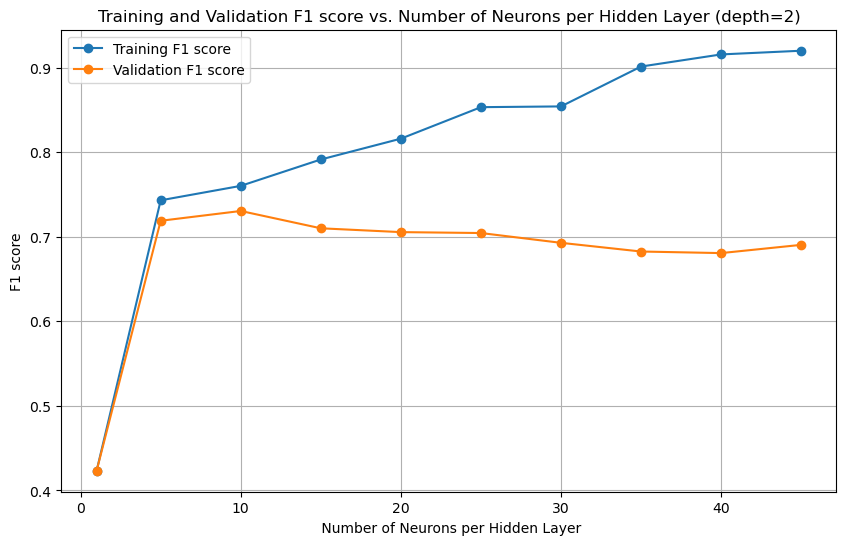

In [78]:
hidden_layer_sizes_int = [size[0] for size in hidden_layer_sizes]


plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_int, train_scores, label='Training F1 score', marker='o')
plt.plot(hidden_layer_sizes_int, validation_scores, label='Validation F1 score', marker='o')
plt.xlabel(' Number of Neurons per Hidden Layer')
plt.ylabel('F1 score')
plt.title('Training and Validation F1 score vs. Number of Neurons per Hidden Layer (depth=2)')
plt.legend()
plt.grid(True)
plt.show()


In [72]:

hidden_layer_sizes = [(10,),  (10,10), (20,10,5), (20,10,5,2)]


train_scores = []
validation_scores = []

for size in hidden_layer_sizes:
    
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=1)

    
    cv_results = cross_validate(mlp, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)

    
    train_scores.append(np.mean(cv_results['train_score']))
    validation_scores.append(np.mean(cv_results['test_score']))


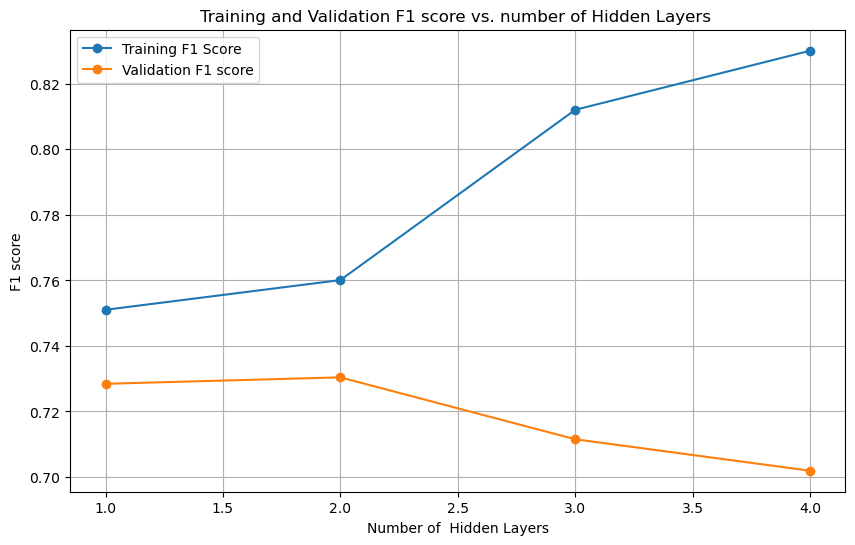

In [74]:

hidden_layer_sizes_int = [len(size) for size in hidden_layer_sizes]


plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_int, train_scores, label='Training F1 Score', marker='o')
plt.plot(hidden_layer_sizes_int, validation_scores, label='Validation F1 score', marker='o')
plt.xlabel('Number of  Hidden Layers')
plt.ylabel('F1 score')
plt.title('Training and Validation F1 score vs. number of Hidden Layers ')
plt.legend()
plt.grid(True)
plt.show()

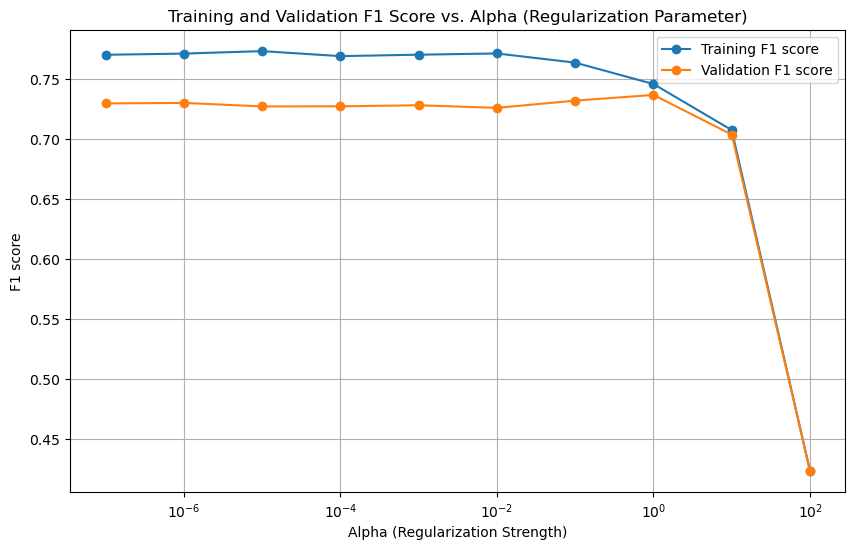

In [291]:

alpha_values = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,1e+1,1e+2]


train_scores_alpha = []
validation_scores_alpha = []


hidden_layer_size = (20,)

for alpha in alpha_values:
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, alpha=alpha, max_iter=1000, random_state=1)
    
    
    cv_results = cross_validate(mlp, X1_train, y1_train, cv=skf1, scoring='f1_macro', return_train_score=True)
    
    
    train_scores_alpha.append(np.mean(cv_results['train_score']))
    validation_scores_alpha.append(np.mean(cv_results['test_score']))


plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores_alpha, label='Training F1 score', marker='o')
plt.plot(alpha_values, validation_scores_alpha, label='Validation F1 score', marker='o')
plt.xscale('log')  
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('F1 score')
plt.title('Training and Validation F1 Score vs. Alpha (Regularization Parameter)')
plt.legend()
plt.grid(True)
plt.show()


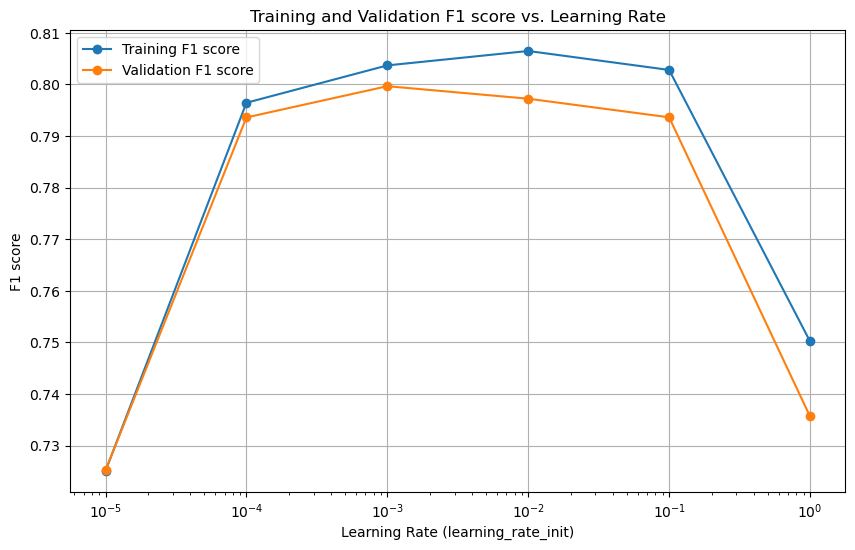

In [292]:

learning_rate_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]


train_scores_lr = []
validation_scores_lr = []


hidden_layer_size = (15,)

for lr in learning_rate_values:
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr, max_iter=1000, random_state=1)
    
    
    cv_results = cross_validate(mlp, X_train, y_train, cv=skf1, scoring='f1_macro', return_train_score=True)
    
    
    train_scores_lr.append(np.mean(cv_results['train_score']))
    validation_scores_lr.append(np.mean(cv_results['test_score']))


plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_scores_lr, label='Training F1 score', marker='o')
plt.plot(learning_rate_values, validation_scores_lr, label='Validation F1 score', marker='o')
plt.xscale('log')  
plt.xlabel('Learning Rate (learning_rate_init)')
plt.ylabel('F1 score')
plt.title('Training and Validation F1 score vs. Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

In [293]:
hidden_layer_sizes = (
    [(i,) for i in range(3, 10)] + 
    [(i, j) for i in range(3, 10) for j in range(3, 10)]  
    
)



param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes
}


mlp = MLPClassifier(hidden_layer_sizes,max_iter=1000, random_state=1)


grid_search = GridSearchCV(mlp, param_grid, cv=skf1, scoring='f1_macro', return_train_score=True)


grid_search.fit(X1_train, y1_train)


print("Best hidden layer architecture: ", grid_search.best_params_)


print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

C:\Users\mehdi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


Best hidden layer architecture:  {'hidden_layer_sizes': (3, 4)}
Best cross-validation score: 0.7358


In [101]:
X_train3, X_valid1, Y_train3, Y_valid1 = train_test_split(X1_train, y1_train, test_size=0.2, random_state=1,stratify=y1_train)

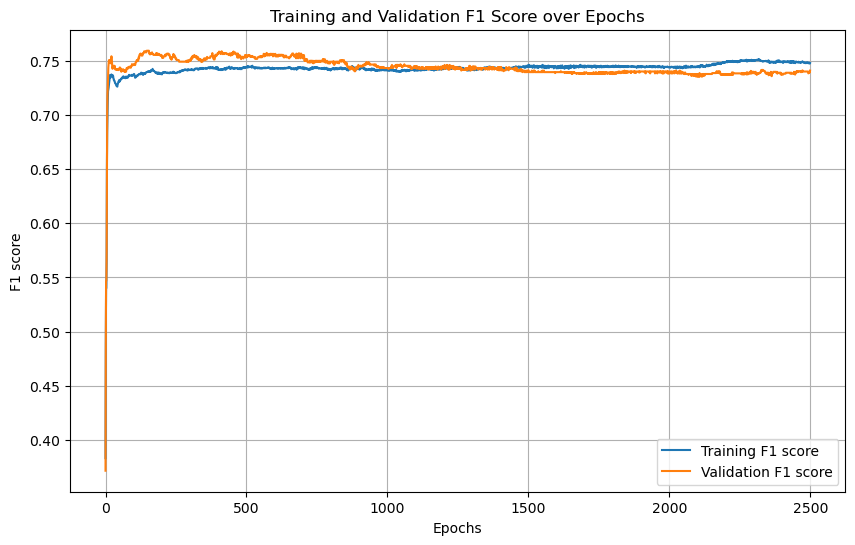

In [107]:
mlp=MLPClassifier(hidden_layer_sizes=(3,4),max_iter=1, random_state=1,warm_start=True)
training_accuracy = []
validation_accuracy = []
for epoch in range(2500): 
    mlp.fit(X_train3, Y_train3)
    
    
   
    Y_train_pred = mlp.predict(X_train3)
    curr_train_accuracy = f1_score(Y_train3, Y_train_pred,average='macro')
    
    
    Y_valid_pred = mlp.predict(X_valid1)
    curr_valid_accuracy = f1_score(Y_valid1, Y_valid_pred,average='macro')
    
    
    training_accuracy.append(curr_train_accuracy)
    validation_accuracy.append(curr_valid_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label="Training F1 score")
plt.plot(validation_accuracy, label="Validation F1 score")
plt.title("Training and Validation F1 Score over Epochs")
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.legend()
plt.grid(True)
plt.show()

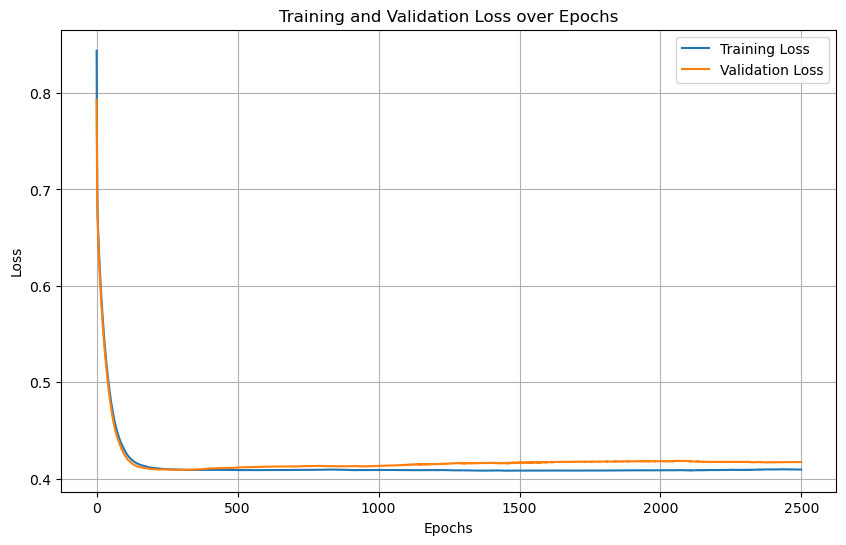

In [108]:
train_loss_, valid_loss_ = [], []


mlp = MLPClassifier(hidden_layer_sizes=(3, 4), max_iter=1, random_state=1, warm_start=True)


for epoch in range(2500):
    
    mlp.fit(X_train3, Y_train3)
    
    
    train_loss_.append(mlp.loss_)
    
    
    valid_loss_.append(log_loss(Y_valid1, mlp.predict_proba(X_valid1)))


plt.figure(figsize=(10, 6))
plt.plot(train_loss_, label="Training Loss")
plt.plot(valid_loss_, label="Validation Loss")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [114]:
param_grid = {
     
    'learning_rate_init': [ 1e-4, 1e-3, 1e-2], 
    'alpha': [1e-1, 1,1e+1]      
}
mlp = MLPClassifier(hidden_layer_sizes=(3,4),max_iter=1000, random_state=1)


grid_search = GridSearchCV(mlp, param_grid, cv=skf1, scoring='f1_macro', return_train_score=True)


grid_search.fit(X1_train, y1_train)


print("Best hidden layer architecture: ", grid_search.best_params_)


print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best hidden layer architecture:  {'alpha': 1, 'learning_rate_init': 0.001}
Best cross-validation score: 0.7350


In [49]:
mlp=MLPClassifier(hidden_layer_sizes=(3,4),random_state=1,max_iter=1000,alpha=1,learning_rate_init=0.001)


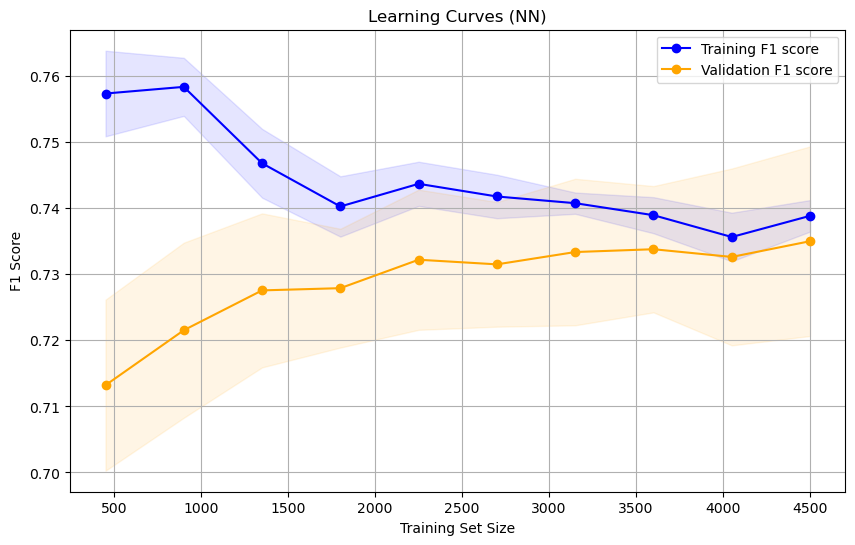

In [50]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=mlp,
    X=X1_train,
    y=y1_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf1,
    scoring='f1_macro',
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training F1 score')
plt.plot(train_sizes, validation_mean, 'o-', color='orange', label='Validation F1 score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title(f'Learning Curves (NN)')
plt.legend()
plt.grid()
plt.show()

In [36]:
start_train_time=time.perf_counter()
mlp.fit(X1_train,y1_train)
end_train_time=time.perf_counter()
start_infer_time=time.perf_counter()
y1_pred = mlp.predict(X1_test)
end_infer_time=time.perf_counter()
report = classification_report(y1_test, y1_pred)
print(report)
print(f1_score(y1_test, y1_pred,average='macro'))
train_time_nn2 = end_train_time - start_train_time
infer_time_nn2 = end_infer_time - start_infer_time
print(f"Training time: {train_time_nn2:.4f} seconds")
print(f"Inference time: {infer_time_nn2:.4f} seconds")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

0.7250487324690028
Training time: 3.4316 seconds
Inference time: 0.0020 seconds


# Comparison of Training and Inference Time

### Abalone Dataset

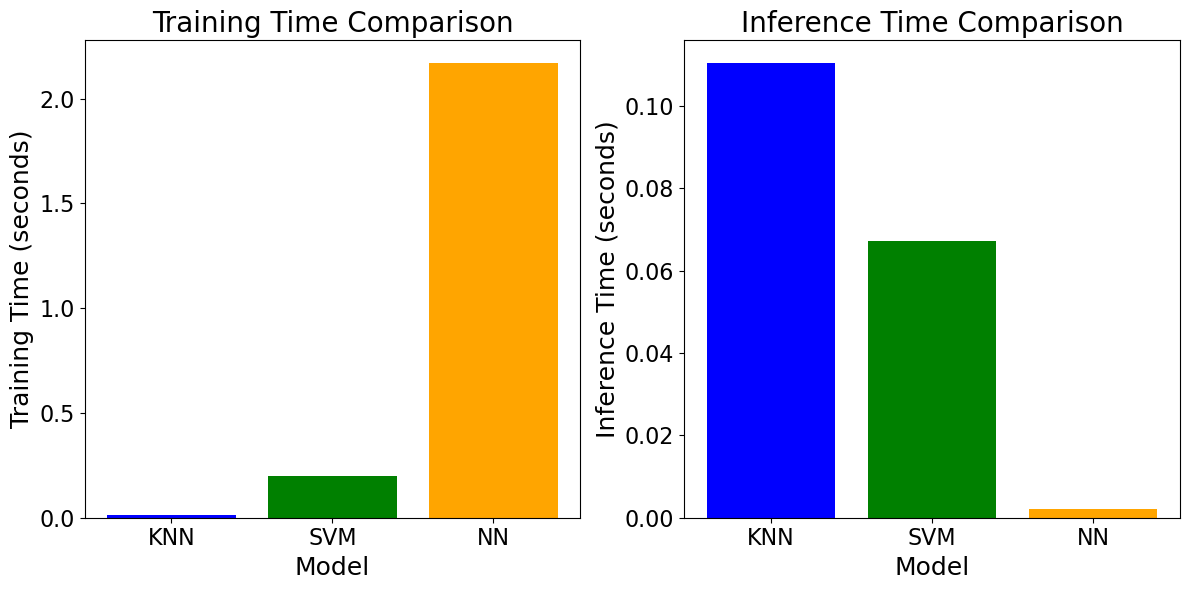

In [44]:

train_times = [train_time_knn1, train_time_svm1, train_time_nn1]
infer_times = [infer_time_knn1, infer_time_svm1, infer_time_nn1]
labels = ['KNN', 'SVM', 'NN']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].bar(labels, train_times, color=['blue', 'green', 'orange'])
axes[0].set_title('Training Time Comparison', fontsize=20)  
axes[0].set_xlabel('Model', fontsize=18)  
axes[0].set_ylabel('Training Time (seconds)', fontsize=18)  
axes[0].tick_params(axis='x', labelsize=16)  
axes[0].tick_params(axis='y', labelsize=16)  


axes[1].bar(labels, infer_times, color=['blue', 'green', 'orange'])
axes[1].set_title('Inference Time Comparison', fontsize=20)  
axes[1].set_xlabel('Model', fontsize=18) 
axes[1].set_ylabel('Inference Time (seconds)', fontsize=18)  
axes[1].tick_params(axis='x', labelsize=16)  
axes[1].tick_params(axis='y', labelsize=16)  


plt.tight_layout()
plt.show()

### Telco Churn Dataset

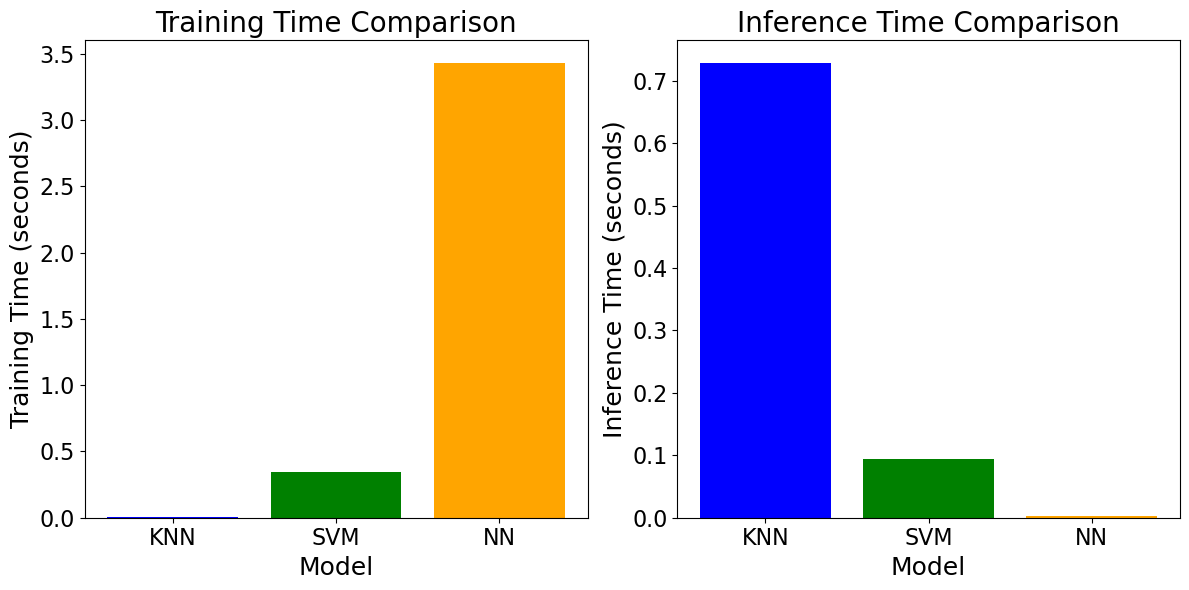

In [46]:
train_times = [train_time_knn2, train_time_svm2, train_time_nn2]
infer_times = [infer_time_knn2, infer_time_svm2, infer_time_nn2]
labels = ['KNN', 'SVM', 'NN']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].bar(labels, train_times, color=['blue', 'green', 'orange'])
axes[0].set_title('Training Time Comparison', fontsize=20)  
axes[0].set_xlabel('Model', fontsize=18) 
axes[0].set_ylabel('Training Time (seconds)', fontsize=18) 
axes[0].tick_params(axis='x', labelsize=16)  
axes[0].tick_params(axis='y', labelsize=16) 


axes[1].bar(labels, infer_times, color=['blue', 'green', 'orange'])
axes[1].set_title('Inference Time Comparison', fontsize=20)  
axes[1].set_xlabel('Model', fontsize=18)  
axes[1].set_ylabel('Inference Time (seconds)', fontsize=18)  
axes[1].tick_params(axis='x', labelsize=16)  
axes[1].tick_params(axis='y', labelsize=16)  


plt.tight_layout()
plt.show()